# Project: Risk Score Prediction In Bank Application
___

## 1. Introduction

Name    : Yonathan Anggraiwan

I am a data scientist working at a financial institution, namely Bank Hebat. A manager has asked me to develop a risk score prediction model for individuals applying for loans at Bank Hebat.

The goal is to identify which features or variables influence a person’s risk score when applying for credit, and to process these variables to build a high-performing model that achieves high accuracy and low error rates in predicting the score. This risk score is needed when the bank wants to assess whether a customer poses a high risk in repaying or settling their loan.

The user/client in this project is a Manager from Bank Hebat.

Objective:
The aim of this program is to ensure I:
- Understand the concepts behind the models used
- Can prepare the data properly
- Can implement the algorithm efficiently to produce accurate predictions in a short amount of time

The algorithms used in this project include several regression methods:
- K-Nearest Neighbors (KNN)
- Decision Tree
- Random Forest
- Support Vector Machine (SVM)
- XGBoost Regressor

Project Goals:
- Understand the overall concept of Machine Learning
- Prepare the data for use in Supervised Learning (Regression) models
- Implement Supervised Learning (Regression) using the selected dataset
- Apply Hyperparameter Tuning and improve model performance
- Deploy the model effectively

Below is the Hugging Face website dashboard I created to visualize and present the results of this modeling project.

Huggingface Deployment [link](https://huggingface.co/spaces/rvpishere/Risk_Score_Prediction_In_Bank_Loan_Application)
___

## 2. Import Libraries

In [1]:
import pandas as pd                                     # Manipulate and analyze tabular data
import numpy as np                                      # Perform numerical operations and array manipulations
import seaborn as sns                                   # Statistical data visualization
import matplotlib.pyplot as plt                         # Create charts and plots for data analysis
import json                                             # Read and write data in JSON format
import pickle                                           # Save and load Python objects in binary format
import os                                               # Handle file and directory operations via the operating system
import scipy.stats as stats                             # Access statistical functions and probability distributions
import time                                             # Manage timing and measure execution duration

from scipy.stats import pearsonr                        # Calculate Pearson correlation between two numerical variables
from sklearn.model_selection import train_test_split    # Split dataset into training and testing sets
from sklearn.preprocessing import MinMaxScaler          # Normalize features using Min-Max scaling to avoid scale differences
from sklearn.preprocessing import OneHotEncoder         # Encode categorical variables into numeric format (nominal scale)
from sklearn.preprocessing import OrdinalEncoder        # Encode categorical variables based on a defined order
from sklearn.pipeline import Pipeline                   # Construct systematic model processing pipelines
from sklearn.compose import ColumnTransformer           # Apply different transformations to specific dataset columns
from sklearn.preprocessing import RobustScaler, StandardScaler # Feature normalization and standardization techniques
from sklearn.metrics import mean_absolute_error, r2_score # Model evaluation metrics: MAE, MSE, R²
from sklearn.model_selection import RandomizedSearchCV  # Randomized hyperparameter search for best model configuration
from sklearn.neighbors import KNeighborsRegressor       # Regression model using nearest neighbors approach
from sklearn.tree import DecisionTreeRegressor          # Regression model based on decision trees
from sklearn.ensemble import RandomForestRegressor      # Ensemble regression using random forest for performance boost
from sklearn.svm import SVR                             # Regression model using Support Vector Regression
from xgboost import XGBRegressor                        # XGBoost regression model using gradient boosting
from sklearn.model_selection import cross_val_score     # Perform cross-validation to assess model performance

___
## 3. Data Loading

To process the dataset, the data must first be loaded using the pandas syntax, namely pd.read_csv(). The data used in this project originates from the Kaggle website, available at the following link:
[Link Data.](https://www.kaggle.com/datasets/lorenzozoppelletto/financial-risk-for-loan-approval?resource=download)

In [2]:
# Load the data
df = pd.read_csv("Risk_Score_Prediction.csv")
df.head(10).T

,0,1,2,3,4,5,6,7,8,9
ApplicationDate,2018-01-01,2018-01-02,2018-01-03,2018-01-04,2018-01-05,2018-01-06,2018-01-07,2018-01-08,2018-01-09,2018-01-10
Age,45,38,47,58,37,37,58,49,34,46
AnnualIncome,39948,39709,40724,69084,103264,178310,51250,97345,116841,40615
CreditScore,617,628,570,545,594,626,564,516,603,612
EmploymentStatus,Employed,Employed,Employed,Employed,Employed,Self-Employed,Employed,Employed,Employed,Employed
EducationLevel,Master,Associate,Bachelor,High School,Associate,Master,High School,High School,Bachelor,Associate
Experience,22,15,26,34,17,16,39,23,12,19
LoanAmount,13152,26045,17627,37898,9184,15433,12741,19634,55353,25443
LoanDuration,48,48,36,96,36,72,48,12,60,12
MaritalStatus,Married,Single,Married,Single,Married,Married,Married,Divorced,Divorced,Married


Insight:
The data has been successfully loaded or retrieved. Below is a brief explanation of the dataset's columns:

| No. | Column Name                   | Description                                                                 |
|-----|-------------------------------|-----------------------------------------------------------------------------|
| 1   | Application Date              | Date of loan application                                                    |
| 2   | Age                           | Borrower's age                                                              |
| 3   | AnnualIncome                  | Individual's annual income                                                  |
| 4   | CreditScore                   | Credit score (higher is better, range: 343–650)                             |
| 5   | EmploymentStatus             | Employment status: Employed, Self-Employed, Unemployed                      |
| 6   | EducationLevel                | Highest level of education: Associate, High School, Bachelor, Master, Doctoral |
| 7   | Experience                    | Total work experience in years                                              |
| 8   | LoanAmount                    | Loan amount requested (currency unit)                                       |
| 9   | LoanDuration                  | Loan duration in months                                                     |
| 10  | MaritalStatus                 | Marital status: Married, Single, Divorced, Widowed                          |
| 11  | NumberOfDependents           | Number of dependents (people supported)                                     |
| 12  | HomeOwnershipStatus          | Home ownership status: Own, Mortgage, Rent, Other                           |
| 13  | MonthlyDebtPayments          | Monthly debt payment amount (currency unit)                                 |
| 14  | CreditCardUtilizationRate    | Credit card utilization rate (scale 0–1)                                    |
| 15  | NumberOfOpenCreditLines      | Number of active credit lines                                               |
| 16  | NumberOfCreditInquiries      | Number of credit report inquiries                                           |
| 17  | DebtToIncomeRatio            | Debt-to-income ratio (e.g., 0.35, 0.24 — higher means riskier)              |
| 18  | BankruptcyHistory            | Bankruptcy history: 0 = Never, 1 = Has history                              |
| 19  | LoanPurpose                  | Purpose of the loan: Home, Debt Consolidation, Education                    |
| 20  | PreviousLoanDefaults         | Number of previous loan defaults                                            |
| 21  | PaymentHistory               | Payment history score (scale 8–45, higher is better)                        |
| 22  | Length of Credit History     | Duration of credit history in years                                         |
| 23  | Savings Account Balance      | Savings account balance (currency unit)                                     |
| 24  | Checking Account Balance     | Checking account balance (currency unit)                                    |
| 25  | Total Assets                 | Total assets owned by the individual                                        |
| 26  | Total Liabilities            | Total liabilities or debt                                                   |
| 27  | Monthly Income               | Monthly income (AnnualIncome divided by 12)                                 |
| 28  | Utility Bills Payment History| History of utility bill payments (scale 0–1, higher is better)              |
| 29  | Job Tenure                   | Duration of stay at current job (in years)                                  |
| 30  | Net Worth                    | Net worth (Total Assets minus Liabilities)                                  |
| 31  | Base Interest Rate           | Bank base interest rate (scale 0–1)                                         |
| 32  | Interest Rate                | Interest rate applied to the loan (scale 0–1)                               |
| 33  | Monthly Loan Payment         | Monthly loan repayment amount (currency unit)                               |
| 34  | Total Debt to Income Ratio   | Total debt-to-income ratio (scale 0–1)                                      |
| 35  | Loan Approved                | Loan approval status: 0 = Rejected, 1 = Approved                            |
| 36  | Risk Score                   | Borrower’s risk score (higher = riskier)                                    |

Next, I want to check the dimensions of this dataset using the .shape syntax.
___

In [3]:
# Check the data dimension
df.shape

(20000, 36)

Insight:

This dataset has dimensions of 20,000 rows and 36 columns.

Next, I want to view a summary of this data using the .info() and .describe() syntax.
___

In [ ]:
# Displaying data information, column types, contents, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

Insight:

Based on the .info() syntax, I can see that this dataset consists of 20,000 rows, and all data is fully populated, meaning there are no missing values. 

However, this still needs to be verified using the .isna() syntax. From my analysis, all columns have values with appropriate data types, except for the ApplicationDate column, which should be of datetime type. Since this column does not contain information that is relevant to the risk score prediction process, it will be removed from the dataset.

In addition, I will also remove the LoanApproved column because the objective is to predict the borrower's RiskScore, which can then be used as a consideration for loan approval by the Bank.

Next, I want to inspect the data’s descriptive statistics using the .describe() syntax. The output includes values such as mean, standard deviation, minimum, and maximum for the numeric columns. This information helps determine whether the numerical data follows a normal distribution, and whether it contains any outliers.
___

In [ ]:
# Checking the descriptive statistics of the numerical data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,39.752600,11.622713,18.000000,32.000000,40.000000,48.000000,8.000000e+01
AnnualIncome,20000.0,59161.473550,40350.845168,15000.000000,31679.000000,48566.000000,74391.000000,4.853410e+05
CreditScore,20000.0,571.612400,50.997358,343.000000,540.000000,578.000000,609.000000,7.120000e+02
Experience,20000.0,17.522750,11.316836,0.000000,9.000000,17.000000,25.000000,6.100000e+01
LoanAmount,20000.0,24882.867800,13427.421217,3674.000000,15575.000000,21914.500000,30835.000000,1.847320e+05
LoanDuration,20000.0,54.057000,24.664857,12.000000,36.000000,48.000000,72.000000,1.200000e+02
NumberOfDependents,20000.0,1.517300,1.386325,0.000000,0.000000,1.000000,2.000000,5.000000e+00
MonthlyDebtPayments,20000.0,454.292700,240.507609,50.000000,286.000000,402.000000,564.000000,2.919000e+03
CreditCardUtilizationRate,20000.0,0.286381,0.159793,0.000974,0.160794,0.266673,0.390634,9.173801e-01
NumberOfOpenCreditLines,20000.0,3.023350,1.736161,0.000000,2.000000,3.000000,4.000000,1.300000e+01


Insight:

Several numerical columns exhibit high standard deviation values, which indicates that the data is highly varied or dispersed. Therefore, it can be concluded that most of these numerical columns do not follow a normal distribution and may contain outliers. 

While I plan to calculate the percentage of outliers, I will not handle or remove them, as I prefer to appreciate the integrity and presence of the data I'm working with.

Next, I want to check whether there are any duplicate rows in the dataset using the .duplicated().sum() syntax.

___

In [ ]:
# Syntax to check the number of duplicate entries
df.duplicated().sum()

np.int64(0)

Insight:

There are no duplicate entries in the dataset. Next, I want to check whether there are any missing values by using the syntax .isna().sum().sum().
___

In [ ]:
df.isna().sum().sum()

np.int64(0)

Insight:

There are no missing values in this dataset.

Next, I want to examine the unique values from all categorical columns to gain further insights.
___

In [6]:
categorical_columns = ['EmploymentStatus',
                       'EducationLevel',
                       'MaritalStatus',
                       'HomeOwnershipStatus',
                       'LoanPurpose']

for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in EmploymentStatus: ['Employed' 'Self-Employed' 'Unemployed']
Unique values in EducationLevel: ['Master' 'Associate' 'Bachelor' 'High School' 'Doctorate']
Unique values in MaritalStatus: ['Married' 'Single' 'Divorced' 'Widowed']
Unique values in HomeOwnershipStatus: ['Own' 'Mortgage' 'Rent' 'Other']
Unique values in LoanPurpose: ['Home' 'Debt Consolidation' 'Education' 'Other' 'Auto']


Insight:

In the 'EmploymentStatus' column, there are 3 unique values:

- 'Unemployed' = Not working / unemployed
- 'Self-Employed' = Entrepreneur
- 'Employed' = Currently employed

In the 'EducationLevel' column, there are 5 unique values:

- 'High School' = High school graduate
- 'Associate' = Diploma / Associate degree
- 'Bachelor' = Undergraduate degree
- 'Master' = Master’s degree
- 'Doctorate' = Doctoral degree

In the 'MaritalStatus' column, there are 4 unique values:

- 'Single' = Not married
- 'Married' = Married
- 'Divorced' = Divorced
- 'Widowed' = Widowed

In the 'HomeOwnershipStatus' column, there are 4 unique values:

- 'Own' = Owns the home
- 'Mortgage' = Paying off the home via mortgage
- 'Rent' = Renting
- 'Other' = Living in government housing, parents’ home, or a home registered under someone else’s name

In the 'LoanPurpose' column, there are 5 unique values:

- 'Home' = To purchase a house or residential property
- 'Debt Consolidation' = Merging multiple debts into one consolidated loan
- 'Education' = For educational expenses
- 'Other' = Other purposes
- 'Auto' = To purchase a vehicle

From these categorical column values, I conclude that there is no high cardinality in the categorical data, as the number of unique values per column is relatively small and manageable. The next step is entering the Exploratory Data Analysis (EDA) phase.

___
## 4. Exploratory Data Analysis (EDA)

During Exploratory Data Analysis (EDA), there are several questions I intend to address:

1.  Does the dataset follow a normal distribution? What is the percentage of outliers present in the data? (Inferential Statistics)

2. Which columns or variables are associated with or influence the Risk Score? (Inferential Statistics)

3. How is the Risk Score distributed based on age, credit score, education level, and employment status? (Line chart)

4. Does a person’s level of education affect their monthly income? (Correlation + Line chart)

5. What is the relationship between a person’s age and their loan amount? (Correlation + Line chart / Scatter plot)

6. Based on marital status, what is the most common purpose of applying for a loan? (Correlation + Line chart / Stacked Bar chart)

7. Which columns or variables are associated with or influence loan approval? (Inferential Statistics)
___

### 4.1 EDA 1. Is The Data Distribution Good? What Are The Outlier Values In This Dataset?

Based on the previous .describe() output, it was observed that several columns do not follow a normal distribution and contain outliers. However, I will proceed to calculate the percentage of outliers to verify how significant they are.

The calculation of outlier percentage is done using the IQR (Interquartile Range) of each column’s values.

The Interquartile Range (IQR) is a statistical measure that reflects the spread of data around the center of its distribution. IQR is calculated as the difference between the third quartile (Q3) and the first quartile (Q1).

- The first quartile (Q1) is the value below which 25% of the data falls

- The third quartile (Q3) is the value below which 75% of the data falls

- Therefore, IQR represents the middle 50% of the data and is commonly used to detect outliers and understand data distribution

IQR is highly useful in data analysis because it is more robust against outliers compared to the overall range. In visualizations, IQR is often shown in box plots, where the lower and upper box edges represent Q1 and Q3 respectively, and the center line indicates the median.

In this process, I created a loop function to check whether the data distribution is skewed. Then, I used a separate function to calculate the percentage of outliers in each column.

In [4]:
# Filter only numeric columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Create a list object to store skewness data
listItem = []

In [5]:
for col in numerical_columns:  # Create a loop to check the distribution of numerical data
    listItem.append([
        col,
        round(df[col].skew(), 1),
        np.where(
            (round(df[col].skew(), 1) <= 0.5) & (round(df[col].skew(), 1) >= -0.5),
            'normal',
            'skewed'
        )
    ])

# Convert the results into a DataFrame to display skewness values
skewness = pd.DataFrame(columns=['Column Name', 'Skewness Value', 'Data Distribution'], data=listItem)
skewness

,Column Name,Skewness Value,Data Distribution
0,Age,0.2,normal
1,AnnualIncome,2.1,skewed
2,CreditScore,-0.6,skewed
3,Experience,0.3,normal
4,LoanAmount,1.8,skewed
5,LoanDuration,0.7,skewed
6,NumberOfDependents,0.6,skewed
7,MonthlyDebtPayments,1.7,skewed
8,CreditCardUtilizationRate,0.6,skewed
9,NumberOfOpenCreditLines,0.6,skewed


Insight:

Only 8 out of the 28 columns follow a normal distribution, while the rest are skewed. The next step is to check the percentage of outliers using a different function.

In [6]:
# Create lists to store column names, lower bounds, upper bounds, and outlier percentages
column = []
lower_bound = []
upper_bound = []
percent_total_outlier = []

# Loop through each numerical column to determine outlier thresholds based on skewness
for row in range(len(skewness)):
    col = skewness['Column Name'][row]

    # Define lower and upper bounds based on data distribution
    if skewness['Data Distribution'][row] == 'skewed':
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (IQR * 3)
        upper_boundary = df[col].quantile(0.75) + (IQR * 3)
    else:
        lower_boundary = df[col].mean() - 3 * df[col].std()
        upper_boundary = df[col].mean() + 3 * df[col].std()

    # Store the results in the corresponding lists
    column.append(col)
    lower_bound.append(lower_boundary)
    upper_bound.append(upper_boundary)

    # Calculate the percentage of outliers in the column
    totalpercent = (
        (len(df[df[col] > upper_boundary]) / len(df) * 100) +
        (len(df[df[col] < lower_boundary]) / len(df) * 100)
    )
    percent_total_outlier.append(round(totalpercent, 2))

# Create a DataFrame to display outlier percentages
outliers = pd.DataFrame({
    'Column Name': column,
    'Outlier Percentage': percent_total_outlier
})

# Display the result
outliers

,Column Name,Outlier Percentage
0,Age,0.21
1,AnnualIncome,1.21
2,CreditScore,0.00
3,Experience,0.24
4,LoanAmount,0.62
5,LoanDuration,0.00
6,NumberOfDependents,0.00
7,MonthlyDebtPayments,0.55
8,CreditCardUtilizationRate,0.00
9,NumberOfOpenCreditLines,0.03


In [21]:
# Filter only numeric columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Function to determine outlier bounds and percentage
def calculate_outliers(group):
    col = group.name  # Get the column name from groupby()

    if col not in numerical_columns:  # Avoid errors if the column is not in the DataFrame
        return np.nan, np.nan, np.nan

    # Determine lower and upper bounds based on data distribution
    data_distribution = group['Data Distribution'].iloc[0]  # Extract distribution from the group
    if data_distribution == 'skewed':
        IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
        lower_boundary = df[col].quantile(0.25) - (IQR * 3)
        upper_boundary = df[col].quantile(0.75) + (IQR * 3)
    else:
        lower_boundary = df[col].mean() - 3 * df[col].std()
        upper_boundary = df[col].mean() + 3 * df[col].std()

    # Calculate outlier percentage in one step
    outlier_mask = (df[col] < lower_boundary) | (df[col] > upper_boundary)
    percent_outlier = round(outlier_mask.mean() * 100, 2)

    return pd.Series(
        [lower_boundary, upper_boundary, percent_outlier],
        index=['Lower Bound', 'Upper Bound', 'Outlier Percentage']
    )

# Group by column name and calculate outlier boundaries and percentages
outliers_df = skewness.groupby('Column Name').apply(calculate_outliers, include_groups=False).reset_index()

# Display the result
outliers_df

,Column Name,Lower Bound,Upper Bound,Outlier Percentage
0,Age,4.884462,74.620738,0.21
1,AnnualIncome,-96457.000000,202527.000000,1.20
2,BankruptcyHistory,0.000000,0.000000,5.24
3,BaseInterestRate,0.132596,0.345653,0.51
4,CheckingAccountBalance,-4174.000000,6851.000000,3.26
5,CreditCardUtilizationRate,-0.528727,1.080155,0.00
6,CreditScore,333.000000,816.000000,0.00
7,DebtToIncomeRatio,-0.526842,1.078204,0.00
8,Experience,-16.427759,51.473259,0.24
9,InterestRate,0.112494,0.365726,0.59


Insight:

Several numerical columns have a high percentage of outliers, notably the "PreviousLoanDefaults" and "BankruptcyHistory" columns. However, these outliers will not be handled—such as by capping or removal—because I choose to preserve the authenticity of this real-world data.

Next, I intend to examine the correlation within the dataset. To measure the relationship between numerical variables and the risk score, I will use Spearman’s correlation algorithm, as the data distribution is non-normal or skewed.

This analysis will be carried out in EDA Part 2.
___

### 4.2 EDA 2. Are There Feature Variables That Are Correlated / Related To The Risk Score?

For the numerical columns, I will perform correlation calculations using the Spearman algorithm, as the data is not normally distributed (i.e., it is skewed). For the categorical columns, the correlation will be assessed using the Chi-square algorithm.

In correlation testing, p-values are calculated. If the p-value is below 0.05, it indicates that the column has a statistically significant correlation or relationship with the target column.

To guide the correlation analysis, I use the following hypothesis framework:

- P-value < 0.05 → Accept H₁ and Reject H₀
- P-value > 0.05 → Accept H₀ and Reject H₁

Where:

- H₀ (Null Hypothesis) means there is no relationship or correlation between columns
- H₁ (Alternative Hypothesis) means there is a relationship or correlation between columns

If the p-value is below 0.05, then the feature or column is considered to be correlated with the target column.

The strength or depth of correlation from Spearman can be seen through its correlation coefficient value, while in the Chi-square test it is interpreted from the Chi-square statistic.

Below is the function I use to calculate the correlation strength of the dataset.

In [8]:
# Remove the 'RiskScore' column from the list so it's treated only as the target variable
numerical_columns = [col for col in numerical_columns if col != 'RiskScore']

# Create a list to store correlation results
spearman_correlation_results = []

# Loop to calculate Spearman correlation and p-value between each numerical column and 'RiskScore'
for col in numerical_columns:
    spearman_corr, p_value = stats.spearmanr(df[col], df['RiskScore'])
    spearman_correlation_results.append([col, round(spearman_corr, 3), round(p_value, 5)])

# Create a DataFrame to display Spearman correlation results
correlation_df = pd.DataFrame(spearman_correlation_results, columns=['Numerical Column', 'Spearman Correlation', 'P-Value'])

# Define categorical columns for Chi-Square testing
categorical_columns = ['EmploymentStatus',
                       'EducationLevel',
                       'MaritalStatus',
                       'HomeOwnershipStatus',
                       'LoanPurpose']

chi_square_results = []

# Create contingency tables and calculate Chi-Square statistic and p-value for each categorical column
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['RiskScore'])
    chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
    chi_square_results.append([col, round(chi2_stat, 3), round(p_value, 5)])

# Create a DataFrame to display Chi-Square test results
chi_square_df = pd.DataFrame(chi_square_results, columns=['Categorical Column', 'Chi-Square Statistic', 'P-Value'])

In [9]:
# Display the results
correlation_df

,Numerical Column,Spearman Correlation,P-Value
0,Age,-0.165,0.00000
1,AnnualIncome,-0.466,0.00000
2,CreditScore,-0.258,0.00000
3,Experience,-0.167,0.00000
4,LoanAmount,0.140,0.00000
5,LoanDuration,0.048,0.00000
6,NumberOfDependents,0.001,0.90636
7,MonthlyDebtPayments,0.035,0.00000
8,CreditCardUtilizationRate,0.111,0.00000
9,NumberOfOpenCreditLines,0.009,0.20072


In [10]:
# Display the results
chi_square_df

,Categorical Column,Chi-Square Statistic,P-Value
0,EmploymentStatus,965.431,0.00000
1,EducationLevel,1185.983,0.00000
2,MaritalStatus,233.281,0.19986
3,HomeOwnershipStatus,220.557,0.40139
4,LoanPurpose,282.946,0.57300


7 out of 28 numerical feature columns are not correlated with the risk score column. These include:

- 'NumberOfDependents'

- 'NumberOfOpenCreditLines'

- 'NumberOfCreditInquiries'

- 'SavingsAccountBalance'

- 'CheckingAccountBalance'

- 'UtilityBillsPaymentHistory'

- 'JobTenure'

3 out of 5 categorical feature columns also show no correlation with a person's risk score. These are:

- 'MaritalStatus'

- 'HomeOwnershipStatus'

- 'LoanPurpose'

Aside from these columns, all remaining features do show some level of correlation with the target column—meaning there are 24 features that influence a person's risk score.

The most influential ones, based on Spearman correlation and Chi-square statistics, are:

- 'MonthlyIncome': -0.46

- 'AnnualIncome': -0.46

- 'TotalDebtToIncomeRatio': 0.45

- 'EmploymentStatus': 965 (Chi-square value)

- 'EducationLevel': 1186 (Chi-square value)

From this, we can conclude that to achieve a low risk score, a person should ideally have a high income—obtained through stable employment—hold a higher education level, and maintain a low debt-to-income ratio (on a 0–1 scale, the lower, the better).

Technically, I could exclude the 10 uncorrelated columns from the modeling process. However, I choose to include all available features in the model out of appreciation for the richness and completeness of the data.

Next, I’ll proceed to Exploratory Data Analysis Part 3.
___

### 4.3 EDA 3. How Is The Distribution Of Risk Score Based On Age, Credit Score, Education, And Employment Status?

To answer this question, I will create a visualization using a line plot.

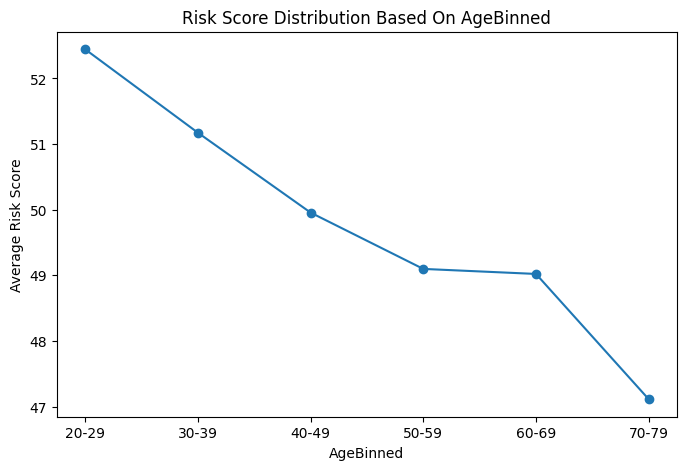

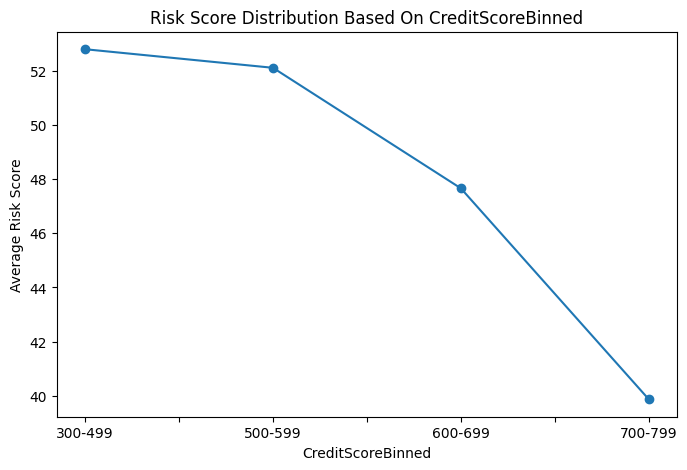

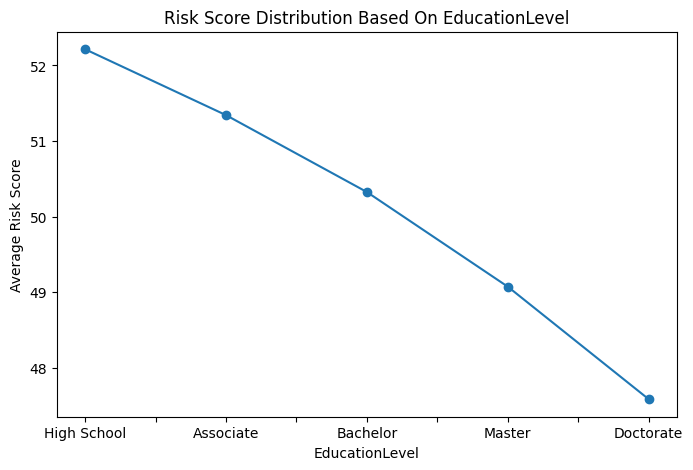

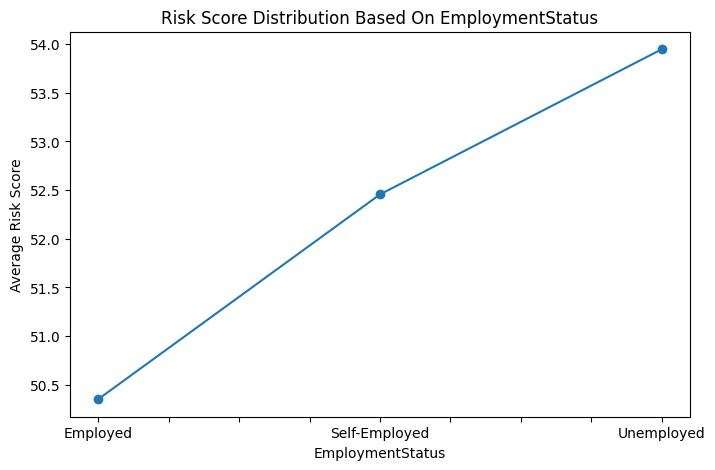

In [22]:
# Define bins for Age and Credit Score
age_bins = [20, 30, 40, 50, 60, 70, 80]
age_labels = [f"{age_bins[i]}-{age_bins[i+1]-1}" for i in range(len(age_bins)-1)]

credit_bins = [300, 500, 600, 700, 800, 900]
credit_labels = [f"{credit_bins[i]}-{credit_bins[i+1]-1}" for i in range(len(credit_bins)-1)]

# Apply binning
df["AgeBinned"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)
df["CreditScoreBinned"] = pd.cut(df["CreditScore"], bins=credit_bins, labels=credit_labels)

# Mengurutkan Education Level dari High School → Associate → Bachelor's → Master's → Doctorate
education_order = ["High School", "Associate", "Bachelor", "Master", "Doctorate"]
df["EducationLevel"] = pd.Categorical(df["EducationLevel"], categories=education_order, ordered=True)

# Define features to analyze
features = ["AgeBinned", "CreditScoreBinned", "EducationLevel", "EmploymentStatus"]

# Loop through each feature and generate the line plot
for feature in features:
    df.groupby(feature, observed=True)["RiskScore"].mean().plot(kind="line", marker="o", figsize=(8,5))

    # Adjust title and labels
    plt.title(f"Risk Score Distribution Based On {feature}")
    plt.xlabel(feature)
    plt.ylabel("Average Risk Score")
    plt.show()

# Remove temporary binned columns after visualization
df.drop(["AgeBinned", "CreditScoreBinned"], axis=1, inplace=True)

Insight:

From the plot visualizations above, several insights can be drawn:

1.  Risk Score Distribution by Age
It can be concluded that younger individuals applying for loans tend to have higher risk scores. The older the person, the lower the risk score. This might be due to older individuals having lower likelihood of fraudulent behavior during loan applications, as they often possess assets that can serve as collateral.

2.  Risk Score Distribution by Credit Score
Individuals with higher credit scores tend to have lower risk scores. Credit scores are generally based on responsible credit card usage or well managed installments. The lower the credit score, the higher the corresponding risk score.

3. Risk Score Distribution by Education Level
There’s a clear indication that individuals with lower levels of education tend to have higher risk scores. So, one way to achieve a lower risk score is by attaining a higher level of education.

4. Risk Score Distribution by Employment Status
Unemployed individuals have the highest risk scores compared to those who are employed or self-employed. Therefore, holding a job either as an employee or entrepreneur can help reduce risk score prior to submitting a loan application.

Next, I’ll proceed to Exploratory Data Analysis Part 4.
___

### 4.4 EDA 4. Does A Higher Level Of Education Influence Monthly Income?

To answer this question, I will calculate correlations and visualize the results using a line plot. The correlation between a categorical column and a numerical column can be measured using the Kruskal–Wallis algorithm, which works by comparing the median values of the numerical column across different categorical groups. 

This algorithm is well-suited for data that is not normally distributed or when sample sizes are small.

In correlation testing, a p-value is calculated. If the p-value is below 0.05, then the column is considered to be correlated or have a relationship with the target column.

I use the following hypotheses for correlation testing:

- P-value < 0.05 → Accept H₁ and Reject H₀

- P-value > 0.05 → Accept H₀ and Reject H₁

Where:

- H₀ (Null Hypothesis) means there is no relationship or correlation between the columns

- H₁ (Alternative Hypothesis) means there is a relationship or correlation between the columns

So, if the p-value is below 0.05, the feature is considered to be correlated with the target column.


In [11]:
# Filter only the categorical and numerical columns needed
education_groups = [df[df["EducationLevel"] == level]["MonthlyIncome"] for level in df["EducationLevel"].unique()]

# Perform Kruskal-Wallis statistical test to check the relationship between EducationLevel and MonthlyIncome
kruskal_stat, p_value = stats.kruskal(*education_groups)

# Display the test result
result_df = pd.DataFrame({
    "Test": ["Kruskal-Wallis"],
    "Statistic": [round(kruskal_stat, 3)],
    "P-Value": [round(p_value, 5)]
})
result_df

,Test,Statistic,P-Value
0,Kruskal-Wallis,504.421,0.0


The Kruskal–Wallis p-value between the EducationLevel column and the MonthlyIncome column shows a very strong correlation, with a test statistic value of 504. This indicates that the higher a person's level of education (EducationLevel), the higher their monthly income tends to be.

Next, I would like to visualize this relationship using a line plot.

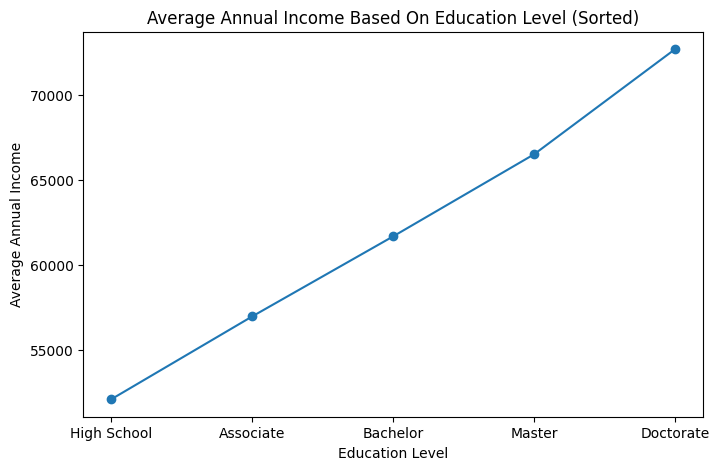

In [23]:
# Group by Education and calculate the average annual income
education_income = df.groupby("EducationLevel", observed=True)["AnnualIncome"].mean().reset_index()

# Sort the values from lowest to highest income
education_income = education_income.sort_values(by="AnnualIncome")

# Plot the sorted data
plt.figure(figsize=(8,5))
plt.plot(education_income["EducationLevel"], education_income["AnnualIncome"], marker="o", linestyle="-")

# Adjust title and labels
plt.title("Average Annual Income Based On Education Level (Sorted)")
plt.xlabel("Education Level")
plt.ylabel("Average Annual Income")
plt.show()

Insight:

he higher a person's level of education, the higher their average monthly income tends to be.

Next, I will proceed to Exploratory Data Analysis Part 5.
___

### 4.5 EDA 5. How Is The Relationship Between A Person's Age And Loan Amount?

To answer this question, I will perform a correlation analysis and create a visualization using a line plot. The correlation calculation will be done using the Spearman algorithm.

In correlation testing, a p-value is calculated. If the p-value is below 0.05, it indicates that the column has a statistically significant correlation or relationship with the target column.

For this analysis, I’ve formulated the following hypotheses:

- P-value < 0.05 → Accept H₁ and Reject H₀

- P-value > 0.05 → Accept H₀ and Reject H₁

Where:
- H₀ (Null Hypothesis) means there is no relationship or correlation between the columns

- H₁ (Alternative Hypothesis) means there is a relationship or correlation between the columns

Thus, if the p-value is below 0.05, the column or feature is considered to be correlated with the target column

In [12]:
# Calculate Spearman correlation
spearman_corr, p_value = stats.spearmanr(df["Age"], df["LoanAmount"])

# Display the result
result_df = pd.DataFrame({
    "Test": ["Spearman Correlation"],
    "Statistic": [round(spearman_corr, 3)],
    "P-Value": [round(p_value, 5)]
})
result_df

,Test,Statistic,P-Value
0,Spearman Correlation,-0.003,0.65235


Insight:

Based on the calculation result, the p-value is greater than 0.05, specifically 0.65, which means that a person’s loan amount is not influenced by their age.

Next, I would like to visualize this relationship using a scatter plot.

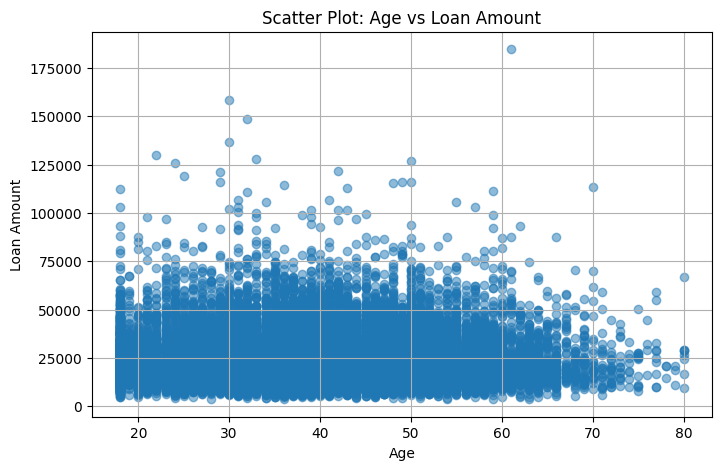

In [13]:
# Create scatter plot
plt.figure(figsize=(8,5))
plt.scatter(df["Age"], df["LoanAmount"], alpha=0.5)

# Add title and axis labels
plt.title("Scatter Plot: Age vs Loan Amount")
plt.xlabel("Age")
plt.ylabel("Loan Amount")
plt.grid(True)
plt.show()

Insight:

From the visualization above, there truly appears to be no clear pattern between a person’s age and the amount of their loan.
___

### 4.6 EDA 6. What Is The Purpose Of A Loan Based On A Person's Marital Status?

To answer this question, I will perform a correlation analysis using the Chi-square test, since I am comparing two categorical columns.

In correlation testing, a p-value is calculated. If the p-value is below 0.05, then the column is considered to have a significant correlation or relationship with the target column.

I use the following hypothesis framework for correlation testing:

- P-value < 0.05 → Accept H₁ and Reject H₀

- P-value > 0.05 → Accept H₀ and Reject H₁

Where:

- H₀ (Null Hypothesis) means there is no relationship or correlation between the columns

- H₁ (Alternative Hypothesis) means there is a relationship or correlation between the columns

Thus, if the p-value is below 0.05, the column or feature is considered to be significantly correlated with the target column.

In [14]:
# Create a contingency table between Marital Status and Loan Purpose
contingency_table = pd.crosstab(df["MaritalStatus"], df["LoanPurpose"])

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display the test result
result_df = pd.DataFrame({
    "Test": ["Chi-Square"],
    "Statistic": [round(chi2_stat, 3)],
    "P-Value": [round(p_value, 5)]
})
result_df

,Test,Statistic,P-Value
0,Chi-Square,12.384,0.41537


Insight:

Based on the calculation result, the p-value is above 0.05—specifically 0.41, which means that a person’s marital status does not influence their loan purpose.

Next, I would like to explore the data distribution using a heatmap to gain deeper insights.

         Test  Statistic  P-Value
0  Chi-Square     12.384  0.41537


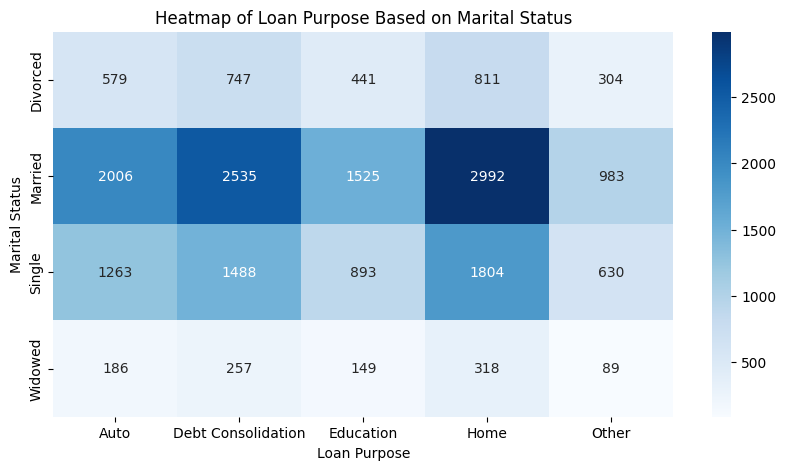

In [ ]:
# Create a contingency table between Marital Status and Loan Purpose
contingency_table = pd.crosstab(df["MaritalStatus"], df["LoanPurpose"])

# Perform Chi-Square test
chi2_stat, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Display test result
result_df = pd.DataFrame({
    "Test": ["Chi-Square"],
    "Statistic": [round(chi2_stat, 3)],
    "P-Value": [round(p_value, 5)]
})
print(result_df)

# Plot heatmap in blue color
plt.figure(figsize=(10,5))
sns.heatmap(contingency_table, annot=True, cmap="Blues", fmt="d")

plt.title("Heatmap of Loan Purpose Based on Marital Status")
plt.xlabel("Loan Purpose")
plt.ylabel("Marital Status")
plt.show()

Insight:

Loan purposes appear evenly distributed across marital statuses, yet the data shows that most applications come from individuals who are married. Among these applications, the majority of loans are intended for purchasing a house or residence.

Up next: diving into Exploratory Data Analysis Part 7.
___

### 4.7 EDA 7. Which Columns Or Variables Influence Loan Approval?

Just like in the first EDA, the key difference here is that all variable columns are being compared to the loan approval status. To answer this question, I will calculate the correlation using the Spearman algorithm, as the data is not normally distributed or is skewed.

In correlation analysis, a p-value is calculated. If the p-value is below 0.05, then the column is considered to be correlated or related to the target column.

I’ve defined the following hypothesis framework for this correlation check:

- P-value < 0.05 → Accept H₁ and Reject H₀

- P-value > 0.05 → Accept H₀ and Reject H₁

Where:

- H₀ (Null Hypothesis) means there is no relationship or correlation between the columns

- H₁ (Alternative Hypothesis) means there is a relationship or correlation between the columns

Thus, if the p-value is less than 0.05, the column or feature is considered to be correlated with the target column.

In [15]:
# Remove the 'LoanApproved' column from the list so it's treated only as the target variable
numerical_columns = [col for col in numerical_columns if col != 'LoanApproved']

# Create a list to store Spearman correlation results
spearman_correlation_results = []

# Loop to calculate Spearman correlation and p-value between each numerical column and 'LoanApproved'
for col in numerical_columns:
    spearman_corr, p_value = stats.spearmanr(df[col], df['LoanApproved'])
    spearman_correlation_results.append([col, round(spearman_corr, 3), round(p_value, 5)])

# Create a DataFrame to display Spearman correlation results
correlation_df = pd.DataFrame(spearman_correlation_results, columns=['Numerical Column', 'Spearman Correlation', 'P-Value'])

# Define categorical columns for Chi-Square testing
categorical_columns = ['EmploymentStatus',
                       'EducationLevel',
                       'MaritalStatus',
                       'HomeOwnershipStatus',
                       'LoanPurpose']

chi_square_results = []

# Create contingency tables and calculate Chi-Square statistic and p-value for each categorical column
for col in categorical_columns:
    contingency_table = pd.crosstab(df[col], df['LoanApproved'])
    chi2_stat, p_value, _, _ = stats.chi2_contingency(contingency_table)
    chi_square_results.append([col, round(chi2_stat, 3), round(p_value, 5)])

# Create a DataFrame to display Chi-Square test results
chi_square_df = pd.DataFrame(chi_square_results, columns=['Categorical Column', 'Chi-Square Statistic', 'P-Value'])

In [16]:
# Displaying the results
correlation_df

,Numerical Column,Spearman Correlation,P-Value
0,Age,0.143,0.00000
1,AnnualIncome,0.567,0.00000
2,CreditScore,0.143,0.00000
3,Experience,0.145,0.00000
4,LoanAmount,-0.260,0.00000
5,LoanDuration,-0.088,0.00000
6,NumberOfDependents,-0.001,0.92091
7,MonthlyDebtPayments,-0.069,0.00000
8,CreditCardUtilizationRate,-0.011,0.12110
9,NumberOfOpenCreditLines,-0.005,0.44417


In [17]:
# Displaying the results
chi_square_df

,Categorical Column,Chi-Square Statistic,P-Value
0,EmploymentStatus,38.507,0.00000
1,EducationLevel,764.755,0.00000
2,MaritalStatus,1.781,0.61900
3,HomeOwnershipStatus,26.329,0.00001
4,LoanPurpose,6.696,0.15287


9 out of 28 feature columns show no correlation or relationship with the target column. These include:

- 'NumberOfDependents'

- 'CreditCardUtilizationRate'

- 'NumberOfOpenCreditLines'

- 'NumberOfCreditInquiries'

- 'DebtToIncomeRatio'

- 'SavingsAccountBalance'

- 'CheckingAccountBalance'

- 'UtilityBillsPaymentHistory'

- 'JobTenure'

Additionally, 2 out of 5 categorical feature columns do not correlate with loan approval status:

- 'MaritalStatus'

- 'LoanPurpose'

Aside from these columns, all other features are correlated with the target variable. This means that 18 columns influence whether a loan application is approved or not.

The most influential features, based on Spearman correlation values, are:

- 'MonthlyIncome': 0.57

- 'AnnualIncome': 0.57

- 'TotalDebtToIncomeRatio': -0.60

This leads to the conclusion that for an individual to have their loan application approved, they should have a high income but maintain a low debt-to-income ratio (on a scale of 0–1, the lower the better).

Next, I’ll move on to the Feature Engineering (FE) phase, where I’ll examine data outliers and begin selecting variables for modeling.

___
## 5. Feature Engineering

The feature engineering phase involves processing the features that will be used in modeling, such as removing irrelevant columns, scaling numerical data, encoding categorical data, and performing PCA (Principal Component Analysis) to reduce the dimensionality of the dataset.

In this feature engineering phase, I will carry out several tasks on the selected features:

1. Removing columns that are irrelevant to the model
2. Checking for outliers
3. Splitting the dataset
4. Scaling and encoding the data

The columns to be removed are:

- 'ApplicationDate' (loan application date), since this does not impact or relate to the modeling of credit risk
- 'LoanApproved' (loan approval status), because the model aims to predict credit risk prior to the bank’s decision to approve or reject the application

In addition, I’ll scale and encode the feature data to ensure consistent value ranges across all columns. This helps the model perform better, remain unbiased, and avoid assuming that features with larger values are more important.

1. Numerical Feature Scaling Methods

    Robust Scaler is used for skewed or non-normally distributed numerical columns:

    - Uses median and IQR (Interquartile Range), making it resistant to extreme outliers

    - Works well with data not normally distributed, unlike StandardScaler which relies on mean and standard deviation

    - Preserves skewness but stabilizes it, making the data more suitable for machine learning

    Standard Scaler is applied to normally distributed numerical columns:

    - Uses mean and standard deviation, transforming the data to have a mean = 0 and standard deviation = 1

    - Ideal for Gaussian-distributed data as it preserves the original distribution

    - Boosts performance in algorithms that are sensitive to feature scaling, such as Linear Regression, KNN, and PCA

    - Not robust to outliers, as extreme values can distort mean and standard deviation


2. Categorical Feature Encoding Methods

    OneHotEncoding is used for categorical variables without a specific order (e.g. gender, color, city, job type)
    - Converts each category into a binary column with values 0 or 1

    OrdinalEncoding is used for categorical variables with inherent order (e.g. education level, customer satisfaction)

    - Converts categories into ordered numerical values, where lower values represent lower levels

All scaling and encoding processes will be stored inside a pipeline to streamline the data handling and prediction modeling workflow—this will be implemented in the Model Training phase.
___


### 5.1 Drop Columns

In [20]:
df.drop(columns=['ApplicationDate',
                 'LoanApproved'], inplace=True)
df

,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,NumberOfDependents,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,45,39948,617,Employed,Master,22,13152,48,Married,2,...,19183,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,49.0
1,38,39709,628,Employed,Associate,15,26045,48,Single,1,...,9595,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,52.0
2,47,40724,570,Employed,Bachelor,26,17627,36,Married,2,...,128874,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,52.0
3,58,69084,545,Employed,High School,34,37898,96,Single,1,...,5370,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,54.0
4,37,103264,594,Employed,Associate,17,9184,36,Married,1,...,17286,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,44,30180,587,Employed,High School,19,24521,36,Married,3,...,25642,2515.000000,0.826217,1,55327,0.216021,0.195574,905.767712,0.627741,55.0
19996,56,49246,567,Employed,Associate,33,25818,36,Married,5,...,5569,4103.833333,0.816618,3,64002,0.227318,0.199168,958.395633,0.334418,54.0
19997,44,48958,645,Employed,Bachelor,20,37033,72,Married,3,...,4653,4079.833333,0.887216,3,103663,0.229533,0.226766,945.427454,0.357227,45.0
19998,60,41025,560,Employed,High School,36,14760,72,Married,3,...,11485,3418.750000,0.843787,5,10600,0.249760,0.264873,411.168284,0.408678,59.0


Insight:

The 'ApplicationDate' and 'LoanApproved' columns have been successfully removed from the dataset. Next, I will proceed to the outlier detection phase.
___

### 5.2 Identify Outliers

For the outlier identification step, it was already performed during EDA Part 1 above. It was observed that several numerical columns have a high percentage of outliers—particularly 'PreviousLoanDefaults' and 'BankruptHistory'. However, these outliers will not be handled (e.g. capped or removed), as I prefer to respect the presence of this real-world data.

Next, I will move on to the data splitting phase, where the dataset will be divided into training and test sets.
___

### 5.3 Splitting Data

Before splitting the data, it’s important to first identify the correlation or relationship between all independent variables (X) and the dependent variable (Y).

In this dataset:

- The dependent variable (Y) is the 'RiskScore' column
- The independent variables (X) are all columns except 'RiskScore'

In [19]:
# Splitting feature data (X) and target data (Y)
x = df.drop(['RiskScore'], axis = 1)            # Define X as features or independent variables
y = df['RiskScore']                             # Define y as the label or dependent variable
x.head(1)                                       # Display the first row of X

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,TotalLiabilities,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,19183,3329.0,0.724972,11,126928,0.199652,0.22759,419.805992,0.181077,0


In [10]:
y.head(1)                                       # Menampilkan nilai y pertama

,RiskScore
0,49.0


Insight:

After the dataset is split, the feature columns are further divided into categorical and numerical features. Once the data is separated into two variables—dependent variable (y) as the label and independent variable (x) as the features, the next step is to split the full dataset into two sets: training data and testing data.

For this model, an 80%–20% ratio is used, where 80% of the data goes into the training set and 20% into the test set. The data is randomized using a random_state value of 42, which means the shuffling process is controlled for reproducibility and consistently yields the same split.

In [20]:
# Create object to store categorical feature columns
cat_features = x.select_dtypes(include=['object', 'category']).columns

# Create object to store numerical feature columns
num_features = x.select_dtypes(include=['number']).columns

# Select columns that will be encoded using ordinal encoding
ordinal_columns = [col for col in cat_features if col in ["EmploymentStatus",
                                                          "EducationLevel",
                                                          "HomeOwnershipStatus"]]
x[ordinal_columns] = x[ordinal_columns].astype(str)

# Select columns that will be encoded using one-hot encoding
one_hot_columns = [col for col in cat_features if col in ["MaritalStatus",
                                                          "LoanPurpose"]]

# Split the data into train and test sets using stratify to preserve the proportional distribution of the target column
# Data is shuffled using random_state = 42 for reproducibility
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Display train and test set sizes
print('Train Size', x_train.shape)
print('Test Size', x_test.shape)

Train Size (16000, 35)
Test Size (4000, 35)


Insight:

After the data is prepared for modeling, the next step is to define the models to be used. In this case, I will compare the performance of five different models to predict a person's risk score:

1. KNN Regressor,
2. Decision Tree Regressor,
3. Random Forest Regressor,
4. SVM Regressor, dan
5. XGBoost.

___
## 6. Model Definition

| Algorithm              | Definition                                                                                                                                         | Advantages                                                                                                     | Disadvantages                                                                                                                |
|------------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------------------------------|
| KNN Regressor          | K-Nearest Neighbors algorithm predicts based on the average of the k-nearest neighbors using distance metrics like Euclidean.                     | Easy to implement and understand. Doesn’t assume data distribution. Suitable for non-linear data.             | Sensitive to value of k. Not scalable for large datasets. Limited performance on complex patterns.                          |
| Decision Tree Regressor| Regression model based on decision trees that split data by decision rules hierarchically until a final prediction is reached.                    | Interpretable and visualizable. No need for normalization. Handles non-linear and categorical data.           | Prone to overfitting on small data. May degrade with many features.                                                         |
| Random Forest Regressor| Ensemble model of multiple decision trees that averages predictions to improve accuracy and reduce overfitting.                                   | More accurate than single trees. Robust to overfitting. Handles both numeric and categorical data.            | Requires more computation. Less interpretable. Slower than simple models.                                                   |
| SVM Regressor          | Support Vector Machine regression finds optimal hyperplane using epsilon-insensitive loss to minimize prediction errors.                          | Effective for small or complex datasets. Handles high-dimensional data. Performs well with non-linear kernels.| Can be slow on large datasets. Sensitive to kernel and parameters. Less intuitive.                                           |
| XGBoost Regressor      | Boosting algorithm that builds trees iteratively and applies regularization to improve accuracy and generalization.                               | Highly accurate and efficient. Handles missing values. Excellent for large datasets. Supports parallelization.| Requires careful tuning. Less interpretable. May consume more memory than simpler models.                                   |

After completing the model definition, the next phase is the model training session.
___
## 7. Model Training

The model training process is carried out sequentially, starting with scaling the numerical data, followed by encoding the categorical data, and finally training the model using the training dataset

In [ ]:
# Define the order for ordinal encoding
employment_mapping = ["Unemployed",
                      "Self-Employed",
                      "Employed"]

education_mapping = ["High School",
                     "Associate",
                     "Bachelor",
                     "Master",
                     "Doctorate"]

home_mapping = ["Other",
                "Rent",
                "Mortgage",
                "Own"]

ordinal_transformer = OrdinalEncoder(categories=[employment_mapping,
                                                 education_mapping,
                                                 home_mapping])

one_hot_transformer = OneHotEncoder(handle_unknown='ignore')

# Select features based on their distribution characteristics
normal_num_features = ["Age", "Experience", "PaymentHistory", "LengthOfCreditHistory",       # Normally distributed features
                       "JobTenure", "BaseInterestRate", "InterestRate"]

skewed_num_features = ["AnnualIncome", "CreditScore", "LoanAmount", "LoanDuration", "NumberOfDependents",  # Skewed features
                       "MonthlyDebtPayments", "CreditCardUtilizationRate", "NumberOfOpenCreditLines",
                       "NumberOfCreditInquiries", "DebtToIncomeRatio", "BankruptcyHistory", "PreviousLoanDefaults",
                       "SavingsAccountBalance", "CheckingAccountBalance", "TotalAssets", "TotalLiabilities", "MonthlyIncome",
                       "UtilityBillsPaymentHistory", "NetWorth", "MonthlyLoanPayment", "TotalDebtToIncomeRatio"]

scalers = {"Standard": StandardScaler(),
           "Robust": RobustScaler()}

# Define numeric transformers using Standard and Robust Scalers
numeric_transformer = ColumnTransformer(
    transformers=[
        ('standard', scalers["Standard"], normal_num_features),
        ('robust', scalers["Robust"], skewed_num_features)])

# Ensure no missing values in ordinal columns
x[ordinal_columns] = x[ordinal_columns].astype(str)

# ColumnTransformer with validated column mappings
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, normal_num_features + skewed_num_features),
        ('ord', ordinal_transformer, ordinal_columns),
        ('cat', one_hot_transformer, one_hot_columns)])

In [ ]:
# Modeling pipeline with KNN Regressor
pipeknn = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor())])

# Modeling pipeline with Decision Tree Regressor
pipedt = Pipeline([
    ('preprocessor', preprocessor),
    ('decisiontree', DecisionTreeRegressor())])

# Modeling pipeline with Random Forest Regressor
piperf = Pipeline([
    ('preprocessor', preprocessor),
    ('randomforest', RandomForestRegressor())])

# Modeling pipeline with SVM Regressor
pipesvm = Pipeline([
    ('preprocessor', preprocessor),
    ('svm', SVR())])

# Modeling pipeline with XGBoost Regressor
pipexgb = Pipeline([
    ('preprocessor', preprocessor),
    ('xgb', XGBRegressor())])

Once the pipelines have been created, the next step is to train the models using the training data.

In [ ]:
%%time
# Train the model
pipeknn.fit(x_train, y_train)
pipedt.fit(x_train, y_train)
piperf.fit(x_train, y_train)
pipesvm.fit(x_train, y_train)
pipexgb.fit(x_train, y_train)

CPU times: user 1min 12s, sys: 316 ms, total: 1min 12s
Wall time: 1min 17s


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  ColumnTransformer(transformers=[('standard',
                                                                                   StandardScaler(),
                                                                                   ['Age',
                                                                                    'Experience',
                                                                                    'PaymentHistory',
                                                                                    'LengthOfCreditHistory',
                                                                                    'JobTenure',
                                                                                    'BaseInterestRate',
                                                                                    'InterestRate']),
                                                                                  ('robust',
                                                                                   RobustScaler(),
                                                                                   ['AnnualIncome',
                                                                                    'CreditScore',
                                                                                    'LoanAmount',
                                                                                    'LoanDuration',
                                                                                    'NumberOfDependents',
                                                                                    'Mont...
                              feature_types=None, gamma=None, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=None, n_jobs=None,
                              num_parallel_tree=None, random_state=None, ...))])

Insight:

After training the data with the training set, the next step is to evaluate the performance of each model. This is done using a loop that displays the performance of each model by calculating two metrics: MAE and R² score.

- MAE (Mean Absolute Error) represents the average error in prediction.

For example: if the predicted result is 100 and the MAE is 10, then the actual value would likely be between 90 and 110.

- R² score measures how well the model can learn and represent the patterns in the data (on a scale from 0 to 1).

The R² values produced from the test and train data should not differ too much, to avoid signs of:
- Overfitting (model adapts too much to the training data)
- Underfitting (model hasn’t learned enough from the data)

___
### 7.1 Comparing 5 Models With K-Fold Validation Score

In [ ]:
%%time
# Store evaluation results in a list
eval_results = []

# Evaluate regression models using R² (Train & Test), MAE, and execution time
for model_name, model in [("KNN Regressor", pipeknn),
                          ("Decision Tree Regressor", pipedt),
                          ("Random Forest Regressor", piperf),
                          ("SVM Regressor", pipesvm),
                          ("XGB Regressor", pipexgb)]:

    start_time = time.time()

    # Predict training and testing data
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    # Calculate evaluation metrics
    r2_train = r2_score(y_train, y_pred_train)
    r2_test = r2_score(y_test, y_pred_test)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    mae_test = mean_absolute_error(y_test, y_pred_test)

    exec_time = time.time() - start_time  # Measure execution time

    # Store evaluation results in the list
    eval_results.append([model_name, r2_train, r2_test, mae_train.round(2), mae_test.round(2), exec_time])

# Display results as a table with R² Train on the left
eval_df = pd.DataFrame(eval_results, columns=["Model", "R2 Train", "R2 Test", "MAE Train", "Mae Test", "Exec Time (s)"])
print(eval_df)

CPU times: total: 23 s
Wall time: 21.9 s


,Model,R2 Train,R2 Test,MAE Train,Mae Test,Exec Time (s)
0,KNN Regressor,0.670679,0.512474,3.31,4.10,0.444907
1,Decision Tree Regressor,1.000000,0.704594,0.00,2.35,0.045793
2,Random Forest Regressor,0.982868,0.880165,0.62,1.70,0.398178
3,SVM Regressor,0.841580,0.817055,2.20,2.47,20.896515
4,XGB Regressor,0.977228,0.895967,0.79,1.68,0.109904


Insight:

From the evaluation, the best performance was achieved by the XGB Regressor algorithm, as it produced the lowest error value, with a relatively small gap between the train and test R² scores—less extreme than the gap seen with Random Forest Regressor.

Next, I will validate this result using K-Fold Cross-Validation, with 5 folds.

How K-Fold Cross-Validation works:

- The dataset is divided into K equally sized parts (folds)

- The model is trained using K-1 folds, and the remaining fold is used for testing

- This process is repeated K times, rotating through the folds so each one serves as the test set once

- This results in K evaluation scores, which are used to compute the mean and standard deviation to assess the model’s stability

In [ ]:
%%time
# Store evaluation results in a list
eval_results = []

# Evaluate regression models using cross-validation
for model_name, model in [
    ("KNN Regressor", pipeknn),
    ("Decision Tree Regressor", pipedt),
    ("Random Forest Regressor", piperf),
    ("SVM Regressor", pipesvm),
    ("XGB Regressor", pipexgb)
]:
    start_time = time.time()

    # Calculate cross-validation scores
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')  # 5-fold CV with R² score
    mean_score = np.mean(scores)  # Average R² score from cross-validation
    std_score = np.std(scores)    # Standard deviation of R² scores

    exec_time = time.time() - start_time  # Measure execution time

    # Append evaluation results to the list
    eval_results.append([model_name, mean_score, std_score, exec_time])

# Display the results in table format
eval_df = pd.DataFrame(eval_results, columns=["Model", "Mean R²", "Std R²", "Exec Time (s)"])
print(eval_df)

                     Model   Mean R²    Std R²  Exec Time (s)
0            KNN Regressor  0.499480  0.022556       2.307478
1  Decision Tree Regressor  0.699563  0.014072       3.961029
2  Random Forest Regressor  0.874872  0.005623     193.792254
3            SVM Regressor  0.814467  0.004247      76.238642
4            XGB Regressor  0.891816  0.004864       6.748852
CPU times: user 4min 42s, sys: 827 ms, total: 4min 43s
Wall time: 4min 43s


Insight:

Based on the average predictions from the 5 folds, the best performance was achieved by the XGB Regressor algorithm, with an average R² score of 0.89, surpassing the Random Forest Regressor which scored 0.87.

However, the SVM Regressor had the lowest average standard deviation, at 0.0042, outperforming XGB Regressor's 0.0048.

Below is the display of the R² scores from each fold for every model that was tested.

In [ ]:
%%time
# Store evaluation results in a list
eval_results = []

# Evaluate regression models using 5-fold cross-validation
for model_name, model in [
    ("KNN Regressor", pipeknn),
    ("Decision Tree Regressor", pipedt),
    ("Random Forest Regressor", piperf),
    ("SVM Regressor", pipesvm),
    ("XGB Regressor", pipexgb)
]:
    scores = cross_val_score(model, x_train, y_train, cv=5, scoring='r2')  # Calculate R² scores from cross-validation

    # Store evaluation results in the list
    for fold_idx, score in enumerate(scores, 1):
        eval_results.append([model_name, fold_idx, score])

# Create a DataFrame to store validation results
eval_df = pd.DataFrame(eval_results, columns=["Model", "Fold", "R² Score"])

# Display R² scores for each fold of every model
print(eval_df)

                      Model  Fold  R² Score
0             KNN Regressor     1  0.510686
1             KNN Regressor     2  0.510719
2             KNN Regressor     3  0.515185
3             KNN Regressor     4  0.454737
4             KNN Regressor     5  0.506071
5   Decision Tree Regressor     1  0.691647
6   Decision Tree Regressor     2  0.685778
7   Decision Tree Regressor     3  0.708405
8   Decision Tree Regressor     4  0.694508
9   Decision Tree Regressor     5  0.696065
10  Random Forest Regressor     1  0.876501
11  Random Forest Regressor     2  0.867086
12  Random Forest Regressor     3  0.874639
13  Random Forest Regressor     4  0.870152
14  Random Forest Regressor     5  0.885710
15            SVM Regressor     1  0.813230
16            SVM Regressor     2  0.814007
17            SVM Regressor     3  0.814933
18            SVM Regressor     4  0.808469
19            SVM Regressor     5  0.821694
20            XGB Regressor     1  0.895795
21            XGB Regressor     

Insight:

1. Based on the modeling results, the KNN Regressor model failed to learn and predict the data effectively, producing the lowest R² score along with the highest MAE error.

2. The Decision Tree Regressor model heavily overfit the training data, achieving an R² score of 1.0 on the train set but only 0.7 on the test set. This indicates poor model performance, with strong signs of overfitting

3. The Random Forest Regressor model closely competed with the XGB Regressor, as it achieved a higher R² score on the train data (0.983) compared to XGB’s 0.976. However, it showed significant overfitting, with an R² score of only 0.87 on the test data, demonstrating a large gap in generalization.

4. The SVM Regressor model had closely matched R² scores on train and test data, but overall its scores were lower than those of Random Forest and XGB Regressors. Additionally, it recorded the second-highest MAE error, following KNN.

5. The XGBoost Regressor model delivered the strongest performance in predicting risk scores (on the test data), with an R² score of 0.89 and a train score of 0.97. Despite some overfitting, it was able to capture complex patterns in the dataset more effectively and demonstrated better overall stability than the Decision Tree and Random Forest models.

Based on these conclusions, I will proceed with hyperparameter tuning on the XGBoost Regressor. Once optimized, this tuned model will be used for model inference and deployment, allowing users to access and benefit from its predictions
___

### 7.2 Hyperparameter Tuning Best Model

| **Parameter Name** | **Description** | **Example Values** |
|---|---|---|
| n_estimators | Number of trees in boosting. A higher value increases model complexity but may lead to overfitting if too large. | 100, 200, 300 |
| learning_rate | The model’s learning speed. Lower values allow gradual learning but require more estimators. | 0.01, 0.05, 0.1 |
| max_depth | Maximum depth of each tree in boosting. Higher values increase complexity but can cause overfitting. | 3, 5, 7 |
| subsample | Percentage of samples used in each boosting iteration. Lower values help reduce overfitting. | 0.5, 0.8, 1.0 |
| colsample_bytree | Percentage of features used in each tree. Lower values help reduce feature correlation. | 0.4, 0.6, 0.8 |
| gamma | Regularization for new splits in trees. Higher values make the model more conservative when splitting nodes. | 0, 0.1, 0.2 |
| reg_alpha | L1 regularization, helps reduce model complexity by eliminating less important features. | 0, 0.01, 0.1 |
| reg_lambda | L2 regularization, helps control feature weights and maintain model stability. | 0.1, 1, 10 |

In [ ]:
%%time
# Define hyperparameter search space optimized for CPU performance
param_distributions = {
    'xgb__n_estimators'     : np.arange(50, 300, 50),       # From 50 to 300 to avoid CPU overload
    'xgb__learning_rate'    : np.linspace(0.01, 0.3, 10),   # From 0.01 to 0.3 with 10 possible values
    'xgb__max_depth'        : np.arange(2, 10, 2),          # Maximum tree depth from 2 to 10
    'xgb__subsample'        : np.linspace(0.5, 1.0, 5),     # Sampling ratio between 50% and 100%
    'xgb__colsample_bytree' : np.linspace(0.5, 1.0, 5),     # Feature sampling per tree between 50% and 100%
    'xgb__gamma'            : np.linspace(0, 5, 5),         # Tree split regularization (0 to 5, higher is more conservative)
    'xgb__reg_alpha'        : np.logspace(-3, 1, 5),        # L1 regularization (lasso) to reduce model complexity
    'xgb__reg_lambda'       : np.logspace(-3, 1, 5)         # L2 regularization (ridge) to control feature weights and stabilize the model
}

# Initialize RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(
    estimator=Pipeline([
        ('preprocessor', preprocessor),  # Preprocessing before feeding into XGBoost
        ('xgb', XGBRegressor(tree_method="hist",   # Using 'hist' method for faster CPU execution
                             n_jobs=-1,            # Utilize all available CPU cores
                             random_state=42))]),  # Random seed for reproducibility

    param_distributions = param_distributions,
    n_iter      = 150,   # Number of search iterations
    scoring     = 'r2',  # Use R² as the main evaluation metric
    cv          = 5,     # Use 5-fold cross-validation
    verbose     = 2,     # Display detailed logs during tuning
    n_jobs      = -1)    # Use all CPU cores


# Fit the tuned model on training data
random_search_xgb.fit(x_train, y_train)

# Display the best hyperparameters found
print("Best Parameters for XGBoost Regressor:", random_search_xgb.best_params_)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Parameter Terbaik Untuk XGBoost Regressor: {'xgb__subsample': np.float64(0.75), 'xgb__reg_lambda': np.float64(1.0), 'xgb__reg_alpha': np.float64(0.001), 'xgb__n_estimators': np.int64(250), 'xgb__max_depth': np.int64(6), 'xgb__learning_rate': np.float64(0.07444444444444444), 'xgb__gamma': np.float64(2.5), 'xgb__colsample_bytree': np.float64(0.625)}
CPU times: total: 26.9 s
Wall time: 2min 31s


Insight:

After obtaining the best parameters for the XGBoost Regressor model in processing this dataset, the next step is to create an object to store these optimal parameters. This object will be used during the prediction phase, as I plan to compare the performance of the untuned model versus the tuned one.
___

In [ ]:
modeltuning = random_search_xgb.best_estimator_

In [ ]:
# Create prediction objects
y_pred_train_xgbtuning = modeltuning.predict(x_train)
y_pred_test_xgbtuning = modeltuning.predict(x_test)

# Evaluate the model using R² and MAE
print('R² Score of Tuned XGB Model on Train Data (Both Scaling):', r2_score(y_train, y_pred_train_xgbtuning).__round__(2))
print('R² Score of Tuned XGB Model on Test Data (Both Scaling):', r2_score(y_test, y_pred_test_xgbtuning).__round__(2))

print('MAE of Tuned XGB Model on Train Data (Both Scaling):', mean_absolute_error(y_train, y_pred_train_xgbtuning).__round__(2))
print('MAE of Tuned XGB Model on Test Data (Both Scaling):', mean_absolute_error(y_test, y_pred_test_xgbtuning).__round__(2))

Skor R2 Tuning Model XGB Data Train Both Scaling: 0.97
Skor R2 Tuning Model XGB Data Test Both Scaling: 0.91
MAE Tuning Model XGB Data Train Both Scaling: 0.93
MAE Tuning Model XGB Data Test Both Scaling: 1.52


Insight:

The model's performance did improve with hyperparameter tuning, but the change wasn't highly significant.

___
### 7.3 K-Fold Validation Score Best Model With Parameter Tuning

In [ ]:
cv_result = pd.DataFrame(random_search_xgb.cv_results_)
cv_result.sort_values('rank_test_score').head(5)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_xgb__subsample,param_xgb__reg_lambda,param_xgb__reg_alpha,param_xgb__n_estimators,param_xgb__max_depth,param_xgb__learning_rate,...,param_xgb__colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
54,2.815110,0.411908,0.039209,0.010220,0.750,0.001,10.000,250,6,0.074444,...,1.000,"{'xgb__subsample': 0.75, 'xgb__reg_lambda': 0....",0.914935,0.909168,0.915316,0.913299,0.910809,0.912706,0.002377,1
73,2.552062,0.461308,0.063503,0.026454,0.500,10.000,0.100,200,6,0.106667,...,0.875,"{'xgb__subsample': 0.5, 'xgb__reg_lambda': 10....",0.914554,0.906925,0.911660,0.908138,0.910955,0.910446,0.002696,2
117,2.526257,0.519699,0.056511,0.019810,0.875,0.001,1.000,200,6,0.074444,...,0.875,"{'xgb__subsample': 0.875, 'xgb__reg_lambda': 0...",0.912757,0.905320,0.912064,0.911989,0.909933,0.910413,0.002716,3
59,1.613813,0.292942,0.037251,0.012847,0.500,0.010,10.000,250,4,0.106667,...,1.000,"{'xgb__subsample': 0.5, 'xgb__reg_lambda': 0.0...",0.911103,0.909782,0.913140,0.909206,0.907515,0.910149,0.001888,4
105,2.001153,0.283542,0.040676,0.006293,0.875,1.000,0.001,200,6,0.074444,...,0.625,"{'xgb__subsample': 0.875, 'xgb__reg_lambda': 1...",0.913226,0.906196,0.911615,0.911098,0.908258,0.910079,0.002518,5


Insight:

Based on the mean and standard deviation values from each cross-validation fold, the differences are relatively small. This indicates that the model, when tuned, will produce many folds with stable scores and minimal variation between the average (mean) score and the standard deviation.

___
## 8. Model Evaluation

Model Evaluation Summary:

1. Choice of Scaling and Encoding Methods Greatly Affects Prediction Results
    In the scaling process, I experimented with a method beyond Robust and Standard scaling—namely, MinMax scaling. This technique rescaled the data to a range of 0–1. However, it turned out to be unsuitable for this dataset, resulting in very poor R² values and high error, even when using XGBoost Regressor.
    
    Therefore, it’s important to understand the data distribution first, along with the characteristics and intended use of each scaling method before making a selection.


    For categorical data encoding, the data type must be clearly identified as either ordinal or nominal. Each type requires a different encoding strategy.
    - Ordinal data should be encoded using Ordinal Encoding, since the values have meaningful ordering or levels.

    - Nominal data should be encoded using OneHotEncoding, which creates new binary columns (0 or 1) for each unique category.

    If a categorical feature contains a large number of unique values, it may be worth considering column removal or applying Principal Component Analysis (PCA) to reduce data dimensionality.


2. Algorithm Selection for Prediction
    In this project, I had the opportunity to compare the performance of five regression models:
    - KNN Regressor
    - Decision Tree Regressor
    - Random Forest Regressor
    - SVM Regressor
    - XGBoost Regressor

Each algorithm has its own strengths and weaknesses, and can be well-suited to specific use cases.

In simpler scenarios, KNN Regressor may be a good first option.

For normally distributed data, Decision Tree Regressor could work well.
    
If the Decision Tree performs poorly, alternatives such as Random Forest or SVM Regressor can be considered.
    
Not every dataset will perform well with XGBoost, although it’s designed to enhance previous models.
    
In my dataset, the model with the highest R² score and lowest MAE was XGBoost Regressor. I performed hyperparameter tuning on this model, but the improvement was not very significant.
    
From the 5-fold cross-validation results of the tuned model, it’s clear that the model performed consistently and stably, as shown by the similarity between its mean score and standard deviation.

The next step is saving the model so it can be used for inference and deployment, allowing users to access and utilize it.

___
## 9. Model Saving

In [ ]:
# Storage path
save_path = "......................"
os.makedirs(save_path, exist_ok=True)  # Create the folder if it doesn't already exist

# Save model with Pickle
for name, obj in {"bestmodelwithtuning.pkl": modeltuning}.items():
    pickle.dump(obj, open(os.path.join(save_path, name), "wb"))

___
## 10. Conclusion
### 10.1 Summary
In data processing using machine learning models, it is not advisable to arbitrarily select algorithms or their parameters. The feature engineering process must be carefully considered, as every step significantly affects the prediction results of the model being used. From data scaling, data encoding, handling missing values, selecting relevant columns, choosing the model algorithm, to hyperparameter tuning—each of these processes needs to be thoroughly understood.

From the dataset I processed using the XGBoost Regressor algorithm and data scaling with both standard scaling and robust scaling, the results obtained were fairly optimal. However, there was slight overfitting, indicated by an R² score of 96% for training predictions and 90% for test predictions. It is very possible that other algorithms could produce better R² values than those used in this study. However, due to time constraints, I was only able to use these five models to predict risk scores for individuals applying for loans at Bank Hebat.

Although not all feature variables directly impact the determination of a person's risk score, I chose to utilize all available data as part of my learning journey in appreciating the data I'm working with. I also remained careful throughout the processing steps to preserve the integrity and authenticity of the dataset.

### 11.2 Suggestions for Future Improvements
Suggestions for future research include performing deeper hyperparameter tuning using a supercomputer, if available. Attention should also be given to using the SVM Regressor algorithm, which has performance comparable to XGBoost Regressor. Future researchers could explore SVM Regressor with extensive hyperparameter tuning, although a supercomputer may be required to process it efficiently. Research by N. Wahyu and Sasongko A. used Grid Search for hyperparameter tuning, showing that wide parameter ranges can improve prediction performance. However, the broader the search range, the heavier the computational load and the longer the processing time will be. [Reference Link 1](https://sistemasi.ftik.unisi.ac.id/index.php/stmsi/article/view/1750/445), [Reference Link 2](https://www.bing.com/search?q=Effect+of+Hyperparameter+Tuning+Using+Random+Search+on+Tree-Based+Classification+Algorithm+for+Software+Defect+Prediction&cvid=b5dbf275fde94e1fbf534cb1f88deab9&gs_lcrp=EgRlZGdlKgYIABBFGDkyBggAEEUYOdIBBzMyOWowajSoAgiwAgE&FORM=ANAB01&PC=LCTS)

Additionally, future researchers could apply ensemble techniques by combining XGBoost and SVM algorithms using stacking or blending to enhance prediction accuracy. Rofik et al. concluded that stacking can significantly improve model performance in classifying good vs. poor credit risk and that threshold settings have a meaningful effect on predictions. [Reference Link](https://shmpublisher.com/index.php/joiser/article/view/203/158)

Feature selection should also be considered by future researchers to identify key features that influence the model. This can increase the accuracy of predictions. Research by Bezerra, F. E. et al. highlights the substantial impact of feature selection on machine learning predictions. [Reference Link](https://www.mdpi.com/2076-3417/14/8/3337)

___

## Bonus Section

This is a bonus session in which I performed classification modeling on the dataset. Using all available columns including the predicted credit score, I built a model to predict whether an individual's loan application will be approved by Bank Hebat.

I conducted this classification process using the XGBoost Classifier algorithm due to limited time availability. Below is the modeling that I produced.

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import f1_score

# Load Dataset
df = pd.read_csv("Risk_Score_Prediction.csv")
df.drop(columns=['ApplicationDate'], inplace=True)

In [ ]:
# Splitting the feature (x) and target (y) data
x = df.drop(['LoanApproved'], axis = 1)     # The X parameter represents the features or independent variables
y = df['LoanApproved']                      # The y parameter represents the label or dependent variable

In [ ]:
cat_features = x.select_dtypes(include=['object', 'category']).columns  
# Create an object to store the categorical feature columns

num_features = x.select_dtypes(include=['number']).columns  
# Create an object to store the numerical feature columns

ordinal_columns = [col for col in cat_features if col in ["EmploymentStatus",
                                                          "EducationLevel",
                                                          "HomeOwnershipStatus"]]
# Identify columns to be treated as ordinal categories

x[ordinal_columns] = x[ordinal_columns].astype(str)  
# Convert the ordinal columns to string data type

one_hot_columns = [col for col in cat_features if col in ["MaritalStatus",
                                                          "LoanPurpose"]]
# Identify columns to be encoded using one-hot encoding

In [ ]:
# Splitting the data into training and testing sets using stratify 
# to ensure proportional representation of the target column, with data shuffled using seed 42.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print('Train Size', x_train.shape)
print('Test Size', x_test.shape)

Train Size (16000, 34)
Test Size (4000, 34)


In [ ]:
# Define the order for ordinal encoding
employment_mapping = ["Unemployed",              # Order categorical ordinal data from lowest to highest
                      "Self-Employed",
                      "Employed"]

education_mapping = ["High School",
                     "Associate",
                     "Bachelor",
                     "Master",
                     "Doctorate"]

home_mapping = ["Other",
                "Rent",
                "Mortgage",
                "Own"]

ordinal_transformer = OrdinalEncoder(categories=[employment_mapping,
                                                 education_mapping,
                                                 home_mapping])

one_hot_transformer = OneHotEncoder(handle_unknown='ignore')

# Select features based on their distribution characteristics
normal_num_features = ["Age", "Experience", "PaymentHistory", "LengthOfCreditHistory",         # Features with normal distribution
                       "JobTenure", "BaseInterestRate", "InterestRate"]

skewed_num_features = ["AnnualIncome", "CreditScore", "LoanAmount", "LoanDuration", "NumberOfDependents",    # Features with skewed distribution
                       "MonthlyDebtPayments", "CreditCardUtilizationRate", "NumberOfOpenCreditLines",
                       "NumberOfCreditInquiries", "DebtToIncomeRatio", "BankruptcyHistory", "PreviousLoanDefaults",
                       "SavingsAccountBalance", "CheckingAccountBalance", "TotalAssets", "TotalLiabilities", "MonthlyIncome",
                       "UtilityBillsPaymentHistory", "NetWorth", "MonthlyLoanPayment", "TotalDebtToIncomeRatio"]

scalers = {"Standard": StandardScaler(),
           "Robust": RobustScaler()}

numeric_transformer = ColumnTransformer(
    transformers=[
        ('standard', scalers["Standard"], normal_num_features),
        ('robust', scalers["Robust"], skewed_num_features)])

# Ensure no missing values in ordinal columns
x[ordinal_columns] = x[ordinal_columns].astype(str)

In [ ]:
# ColumnTransformer with column validation
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, normal_num_features + skewed_num_features),
        ('ord', ordinal_transformer, ordinal_columns),
        ('cat', one_hot_transformer, one_hot_columns)])

# Modeling pipeline using XGBoost Classifier
pipexgbc = Pipeline([
    ('preprocessor', preprocessor),
    ('xgbc', XGBClassifier())])

pipexgbc.fit(x_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  ColumnTransformer(transformers=[('standard',
                                                                                   StandardScaler(),
                                                                                   ['Age',
                                                                                    'Experience',
                                                                                    'PaymentHistory',
                                                                                    'LengthOfCreditHistory',
                                                                                    'JobTenure',
                                                                                    'BaseInterestRate',
                                                                                    'InterestRate']),
                                                                                  ('robust',
                                                                                   RobustScaler(),
                                                                                   ['AnnualIncome',
                                                                                    'CreditScore',
                                                                                    'LoanAmount',
                                                                                    'LoanDuration',
                                                                                    'NumberOfDependents',
                                                                                    'Mont...
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [ ]:
# Start measuring execution time
start_time = time.time()

# Train the XGBoost Classifier model
pipexgbc.fit(x_train, y_train)

# Predict train and test data
y_pred_train = pipexgbc.predict(x_train)
y_pred_test = pipexgbc.predict(x_test)

# Calculate evaluation metrics
f1_train = f1_score(y_train, y_pred_train)
f1_test = f1_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

exec_time = time.time() - start_time  # Calculate execution time

# Save the evaluation results into a DataFrame
eval_df = pd.DataFrame([["XGBoost Classifier", f1_train, f1_test, mae_test, exec_time]],
                       columns=["Model", "F1 Train", "F1 Test", "MAE", "Exec Time (s)"])

print(eval_df)

                Model  F1 Train   F1 Test      MAE  Exec Time (s)
0  XGBoost Classifier       1.0  0.906733  0.04675        0.40991


By performing classification using the XGBoost Classifier algorithm, an F1 score of 90% was achieved. The F1 score metric was chosen to account for the impact of false positives and false negatives in the prediction results.

Next, I will save this model for use in model deployment.
___

In [ ]:
# Save path
save_path = "........................."
os.makedirs(save_path, exist_ok=True)  # Create the folder if it doesn't already exist

# Save the model using Pickle
for name, obj in {"classifier.pkl": pipexgbc}.items():
    pickle.dump(obj, open(os.path.join(save_path, name), "wb"))

____